### The one below is the Excel containing the information regarding the various parameters

## ALL THIS INFORMATION SHOULD BE UNPACKED AND PRESENTED HERE IN A BETTER FORM

In [ ]:
shinkansen_travel_experince_parameters = pd.read_excel('Data_Dictionary.xlsx')

In [ ]:
shinkansen_travel_experince_parameters.head(3)

,Data Dictionary - Travel Data,Unnamed: 1,Unnamed: 2
0,Column Name,Column Description,Column Value Examples
1,ID,The unique ID of the passenger,"Continuous values like 98800001, 98800002, etc."
2,Gender,The gender of the passenger,Male\nFemale


In [113]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer

Load and View the Data Set

In [21]:
shin_exp = pd.read_csv('Surveydata_train.csv')

In [22]:
shin_exp.head(5)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


Check the Shape and Informations (about possible missing Values in the Data Set)

In [23]:
shin_exp.shape  # first one N° of Rows and the second one N° of Columns

(94379, 17)

In [24]:
shin_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

#### All the Columns except for ID and Overall_Experience (which is our Target) HAVE Missing Values
#### All the Values are string object that must be modified to numeric one with either one-hot encoding

In [25]:
# Let's check for duplicate values in the data
shin_exp.duplicated().sum()

0

In [26]:
# Let's check for missing values in the data
round(shin_exp.isnull().sum() / shin_exp.isnull().count() * 100, 2)

ID                         0.00
Overall_Experience         0.00
Seat_Comfort               0.06
Seat_Class                 0.00
Arrival_Time_Convenient    9.46
Catering                   9.26
Platform_Location          0.03
Onboard_Wifi_Service       0.03
Onboard_Entertainment      0.02
Online_Support             0.10
Ease_of_Online_Booking     0.08
Onboard_Service            8.05
Legroom                    0.10
Baggage_Handling           0.15
CheckIn_Service            0.08
Cleanliness                0.01
Online_Boarding            0.01
dtype: float64

In [30]:
shin_exp.isna().sum()


ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

Every Feature has missing values. The features with moost missing values are:

Arrival_Time_Convenient, Catering, Onboard_Service with almost 10% of data missing

All the other have around less than 0.1% of missing values --> Hence they can be treated last

In [27]:
# Printing the % sub categories of each category

for i in shin_exp.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(shin_exp[i].value_counts())
    print("*" * 50)

Unique values in Seat_Comfort are :
Acceptable           21158
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: Seat_Comfort, dtype: int64
**************************************************
Unique values in Seat_Class are :
Green Car    47435
Ordinary     46944
Name: Seat_Class, dtype: int64
**************************************************
Unique values in Arrival_Time_Convenient are :
Good                 19574
Excellent            17684
Acceptable           15177
Needs Improvement    14990
Poor                 13692
Extremely Poor        4332
Name: Arrival_Time_Convenient, dtype: int64
**************************************************
Unique values in Catering are :
Acceptable           18468
Needs Improvement    17978
Good                 17969
Poor                 13858
Excellent            13455
Extremely Poor        3910
Name: Catering, dtype: int64
*************************************

## Exploratory Data Analysis --> Later On

# Data Preprocessing


In [28]:
# ID consists of uniques ID for clients and hence will not add value to the modeling


shin_exp_v2 = shin_exp.copy()
shin_exp_v2.drop(["ID"], axis=1, inplace=True)

shin_exp_v2.head()

,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


### Separating the independent variables (X) and the dependent variable (Y)


In [32]:
X = shin_exp_v2.drop(["Overall_Experience"], axis=1) # keep it as a Matrix
y = shin_exp_v2["Overall_Experience"]  # keep it as an array

X.shape

(94379, 15)

### 14 Categories can be Ordered as 0 to 5 because they go from Extremely poor to Excellent
### 1 Category --> Seat_Class has only 2 values uncorrelated

In [105]:
def Ordinal_encoding(element_i):
    mapping =  {'Extremely Poor': 0, 'Poor': 1, 'Needs Improvement': 2, 'Acceptable':3, 'Good':4, 'Excellent':5,
                'Very Inconvenient': 0, 'Inconvenient': 1, 'Needs Improvement': 2, 'Manageable':3, 'Convenient':4, 'Very Convenient':5,
                'Green Car':1, 'Ordinary':0}

    #mapping2 =  {'Very Inconvenient': 0, 'Inconvenient': 1, 'Needs Improvement': 2, 'Manageable':3, 'Convenient':4, 'Very Convenient':5}


    try:
        data = mapping[element_i]
        return data
    except:
        return np.NaN

In [107]:
X_v2 = X.copy()

In [108]:
for column_i in X_v2.columns:
    X_v2[column_i] = X_v2[column_i].apply(Ordinal_encoding)

X_v2.head(1)

,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,2.0,1,5.0,5.0,5.0,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0


In [109]:
X.head(1)

,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor


In [110]:
X_v2.isna().sum() == X.isna().sum()


Seat_Comfort               True
Seat_Class                 True
Arrival_Time_Convenient    True
Catering                   True
Platform_Location          True
Onboard_Wifi_Service       True
Onboard_Entertainment      True
Online_Support             True
Ease_of_Online_Booking     True
Onboard_Service            True
Legroom                    True
Baggage_Handling           True
CheckIn_Service            True
Cleanliness                True
Online_Boarding            True
dtype: bool

# HERE START The IMPUTATION

In [112]:
X_v2.isna().sum()

Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

# IMPUTATION Option 1 --> AFTER THE MEAN WE SHOULD TRY IN THE NEXT ITERATION KNN OR LINEAR REGRESSION (But for now this is good)

In [116]:
# Columns to impute
reqd_col_for_impute = ['Seat_Comfort',  'Arrival_Time_Convenient', 'Catering','Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding']

# Simple Imputer with Mode
imputer = SimpleImputer(strategy="most_frequent")

# Fit and transform the train data
X_v2[reqd_col_for_impute] = imputer.fit_transform(X_v2[reqd_col_for_impute])


# Checking that no column has missing values in train or test sets
print(X_v2.isna().sum())
print("-" * 30)
#print(X_test.isna().sum())

Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64
------------------------------


# Building the Model  ---> LATER I WILL ADD THE PIPELINES --> NOW IT IS JUST A START

### Splitting the Data

In [128]:
X_train,X_test,y_train,y_test=train_test_split(X_v2 , y, test_size=0.3, random_state=5, stratify=y)

In [129]:
# Fitting logistic regression model

lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [130]:
# Creating metric function 

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

           0       0.79      0.78      0.78     29950
           1       0.82      0.83      0.82     36115

    accuracy                           0.81     66065
   macro avg       0.81      0.80      0.80     66065
weighted avg       0.81      0.81      0.81     66065



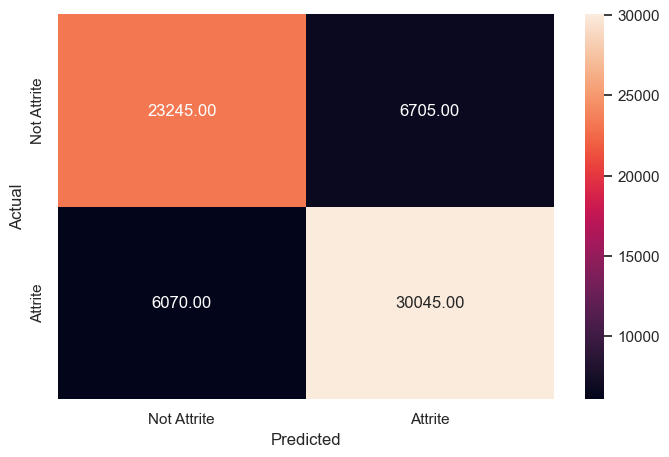

In [131]:
y_pred_train = lg.predict(X_train)

metrics_score(y_train, y_pred_train)

# Here Show the Power of a Pipeline

In [132]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [133]:
X_train,X_test,y_train,y_test=train_test_split(X_v2 , y, test_size=0.3, random_state=5, stratify=y)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78     29950
           1       0.82      0.83      0.82     36115

    accuracy                           0.81     66065
   macro avg       0.81      0.80      0.80     66065
weighted avg       0.81      0.81      0.81     66065



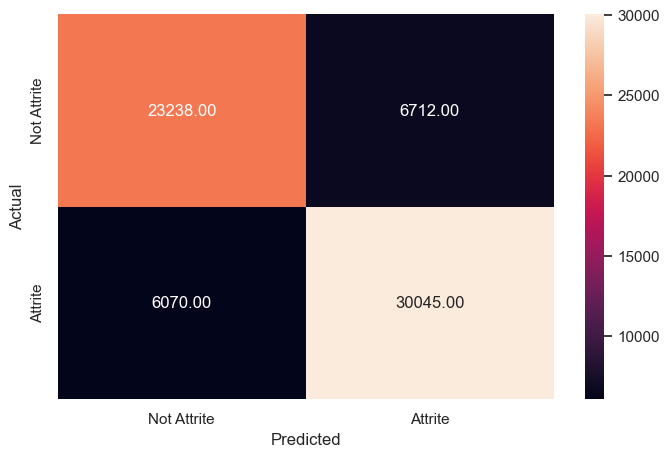

In [134]:
numeric_features = X_v2.columns

numeric_transformer = Pipeline(
    steps = [('imputer', SimpleImputer(strategy='median') ), ('scaler', MinMaxScaler() )]
)

# Here the pre-processor step
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numeric_features )
    ]
)

# here the Pipeline
pipe_lg = Pipeline(
    steps = [('preprocessor', preprocessor), ('regressor', LogisticRegression() ) ]
)

pipe_lg.fit(X_train, y_train)

y_pred_train = pipe_lg.predict(X_train)

metrics_score(y_train, y_pred_train)
